# Chart pattern - v2 - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import os
from pathlib import Path
import pandas_ta as ta
import pspriceaction.price_action as pa
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
data = []
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
algo_dir = current_dir.parent.parent
transform_csv_file = str(current_dir) + '/VN30F1M_5minutes_pattern.csv'
if os.path.isfile(transform_csv_file):
    data = pd.read_csv(transform_csv_file, index_col='Date', parse_dates=True)
    data['model'] = data['model'].fillna(value='')
else:
    csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
    is_file = os.path.isfile(csv_file)
    if is_file:
        dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
    else:
        dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)
    data = dataset.copy()
    data = pa.pattern_modeling(data)
    data.to_csv(transform_csv_file)

In [3]:
data["ma_line"] = data["Close"].rolling(20).mean()
data['above_ma'] = data.apply(lambda r: 1 if r['Close'] > r['ma_line'] else 0, axis=1)
data['below_ma'] = data.apply(lambda r: 1 if r['Close'] < r['ma_line'] else 0, axis=1)
data['total_above_ma'] = data['above_ma'].rolling(150).sum()
data['total_below_ma'] = data['below_ma'].rolling(150).sum()
data['total_above_ma_1w'] = data['above_ma'].rolling(250).sum()
data['total_below_ma_1w'] = data['below_ma'].rolling(250).sum()
data['trend_3d'] = data.apply(lambda r: 'switch' if r['total_above_ma'] == r['total_below_ma'] else ('up' if r['total_above_ma'] > r['total_below_ma'] else 'down'), axis=1)
data['trend_1w'] = data.apply(lambda r: 'switch' if r['total_above_ma_1w'] == r['total_below_ma_1w'] else ('up' if r['total_above_ma_1w'] > r['total_below_ma_1w'] else 'down'), axis=1)
data["RSI"] = ta.rsi(data["Close"], length=14)

In [4]:
data.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
model                 object
ma_line              float64
above_ma               int64
below_ma               int64
total_above_ma       float64
total_below_ma       float64
total_above_ma_1w    float64
total_below_ma_1w    float64
trend_3d              object
trend_1w              object
RSI                  float64
dtype: object

In [5]:
data[data.model != '']

,Open,High,Low,Close,model,ma_line,above_ma,below_ma,total_above_ma,total_below_ma,total_above_ma_1w,total_below_ma_1w,trend_3d,trend_1w,RSI
Date,,,,,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,-,NaN,0,0,NaN,NaN,NaN,NaN,down,down,NaN
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,-,NaN,0,0,NaN,NaN,NaN,NaN,down,down,NaN
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,-,NaN,0,0,NaN,NaN,NaN,NaN,down,down,NaN
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,-,NaN,0,0,NaN,NaN,NaN,NaN,down,down,NaN
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,-,NaN,0,0,NaN,NaN,NaN,NaN,down,down,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 11:00:00,1304.3,1304.7,1303.7,1304.1,falling_n,1306.890,0,1,63.0,86.0,112.0,137.0,down,down,48.258306
2024-07-19 11:10:00,1303.0,1303.0,1301.1,1302.2,fair_value_falling_gap,1306.280,0,1,61.0,88.0,112.0,137.0,down,down,41.245605
2024-07-19 13:10:00,1303.0,1303.3,1300.5,1300.7,falling_three,1304.245,0,1,59.0,90.0,112.0,137.0,down,down,38.679115


## Calculating return

In [6]:
def has_bullish_pattern(model):
    if "bullish" in model or "rising" in model:
        return True
    return False

def has_bearish_pattern(model):
    if "bearish" in model or "falling" in model:
        return True
    return False

In [7]:
%%time
data['return'] = ''
data['signal'] = ''
data['exit_time'] = ''
# Stoploss at x0 pips
sl_step = 3
# Takeprofit at y0 pips(R/R = 1/3)
tp_step = 9
for i, row in data.iterrows():
    if has_bullish_pattern(row['model']):
        # Long signal
        data.at[i, 'signal'] = 'long'
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        entry_price = row['Close']
        data_to_end_day = data[(data.index > current_time) & (data.index < current_date+' 14:30:00')]
        max_price = 0
        exit_time = ''
        for k, wrow in data_to_end_day.iterrows():
            if wrow['Low'] < entry_price and wrow['Low'] < entry_price - sl_step:
                # Stop loss
                momentum = -sl_step
                exit_time = wrow.name
                break
            else:
                if wrow['High'] > entry_price + tp_step:
                    # Take profit
                    momentum = tp_step
                    exit_time = wrow.name
                    break
                else:
                    # Close at 02:25PM
                    momentum = wrow['Close'] - entry_price
                    exit_time = wrow.name
        data.at[i, 'return'] = momentum
        data.at[i, 'exit_time'] = exit_time
    elif has_bearish_pattern(row['model']):
        # Short signal
        data.at[i, 'signal'] = 'short'
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        entry_price = row['Close']
        data_to_end_day = data[(data.index > current_time) & (data.index < current_date+' 14:30:00')]
        min_price = 10000
        exit_time = ''
        for k, wrow in data_to_end_day.iterrows():
            if wrow['High'] > entry_price and wrow['High'] > entry_price + sl_step:
                # Stop loss
                momentum = -sl_step
                exit_time = wrow.name
                break
            else:
                if wrow['Low'] < entry_price - tp_step:
                    # Take profit
                    momentum = tp_step
                    exit_time = wrow.name
                    break
                else:
                    # Close at 02:25PM
                    momentum = entry_price - wrow['Close']
                    exit_time = wrow.name
        data.at[i, 'return'] = momentum
        data.at[i, 'exit_time'] = exit_time

CPU times: user 19 s, sys: 2.55 ms, total: 19 s
Wall time: 19 s


### Current close vs High & Low before

In [8]:
%%time
clone_data = data[['High', 'Low', 'Close']]
diff_high_before = []
diff_low_before = []
for i, row in clone_data.iterrows():
    if 100*row.name.hour + row.name.minute == 900:
        diff_high_before.append(0)
        diff_low_before.append(0)
    else:
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        data_from_start_day = clone_data[(clone_data.index < current_time) & (clone_data.index > current_date+' 08:30:00')]
        max_high = data_from_start_day['High'].max()
        min_low = data_from_start_day['Low'].min()
        current_close = row['Close']
        dhb = 1000 * (max_high - current_close) / max_high
        dlb = 1000 * (current_close - min_low) / min_low
        diff_high_before.append(dhb)
        diff_low_before.append(dlb)
data["diff_high"] = diff_high_before
data["diff_low"] = diff_low_before
data["diff_high"] = data["diff_high"].round(2)
data["diff_low"] = data["diff_low"].round(2)

CPU times: user 56 s, sys: 5.96 ms, total: 56 s
Wall time: 56 s


In [9]:
def group_rsi(row):
    if row['RSI'] < 31:
        return 30
    if 30 < row['RSI'] < 41:
        return 40
    if 40 < row['RSI'] < 51:
        return 50
    if 50 < row['RSI'] < 61:
        return 60
    if 60 < row['RSI'] < 71:
        return 70
    else:
        return 100
data["RSI_group"] = data.apply(lambda r: group_rsi(r), axis=1)

In [10]:
data['upper_wick'] = data.apply(
    lambda r: r['High'] - max(r['Open'], r['Close']), axis=1)
data['tail'] = data.apply(
    lambda r: min(r['Open'], r['Close']) - r['Low'], axis=1)
data['upper_wick'] = data['upper_wick'].round(1)
data['tail'] = data['tail'].round(1)

## Return Analytics

In [11]:
has_return = data[data['return'] != '']

In [12]:
long_return = has_return[has_return['signal'] == 'long']
short_return = has_return[has_return['signal'] == 'short']

In [13]:
negative_return = has_return[has_return['return'] < 0]
positive_return = has_return[has_return['return'] > 0]

In [14]:
short_negative_return = short_return[short_return['return'] < 0]
short_positive_return = short_return[short_return['return'] > 0]
long_negative_return = long_return[long_return['return'] < 0]
long_positive_return = long_return[long_return['return'] > 0]

In [15]:
has_return['return'].count()

10436

In [16]:
has_return['return'].sum()

5939.399999999991

### Total above & below MA & return relationship

In [17]:
long_return['above_ma_group'] = pd.qcut(long_return['total_above_ma'], 30)
long_return['above_ma_1w_group'] = pd.qcut(long_return['total_above_ma_1w'], 25)
wtg = long_return.groupby(['above_ma_group', 'above_ma_1w_group'])[['return']].sum()
irs = wtg.reset_index()
glue = irs.pivot(index="above_ma_group", columns="above_ma_1w_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)
glue

above_ma_1w_group,"(44.999, 78.0]","(78.0, 87.0]","(87.0, 94.0]","(94.0, 99.0]","(99.0, 103.0]","(103.0, 107.0]","(107.0, 112.0]","(112.0, 115.0]","(115.0, 119.0]","(119.0, 122.0]",...,"(139.0, 143.0]","(143.0, 146.0]","(146.0, 149.0]","(149.0, 153.0]","(153.0, 156.0]","(156.0, 161.0]","(161.0, 166.0]","(166.0, 172.0]","(172.0, 180.0]","(180.0, 221.0]"
above_ma_group,,,,,,,,,,,,,,,,,,,,,
"(116.3, 145.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,-3.0,-5.8,-6.9,-24.9,-20.6,40.0,-38.1,192.0
"(110.0, 116.3]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.1,16.5,-6.0,2.8,-17.3,-26.7,25.2,56.6,12.2
"(106.0, 110.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,...,-12.1,12.0,1.8,43.2,-8.7,40.3,51.4,5.0,48.0,-45.1
"(103.0, 106.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,15.0,...,56.6,3.1,4.0,5.4,-34.7,18.9,57.5,45.1,63.9,5.3
"(101.0, 103.0]",0.0,0.0,0.0,0.0,0.0,7.2,0.0,0.0,19.3,0.0,...,-18.5,51.9,15.8,56.5,-0.3,-14.5,41.5,28.9,-8.7,-8.7
"(98.0, 101.0]",0.0,0.0,0.0,0.0,0.0,9.0,-3.0,-3.0,-1.7,16.6,...,-4.2,17.6,9.2,14.0,-1.6,64.6,93.7,-0.1,-1.1,8.8
"(96.0, 98.0]",0.0,0.0,0.0,0.0,0.0,-3.0,-6.0,-6.0,-4.1,6.7,...,11.1,-5.0,8.7,16.7,13.8,15.7,-7.3,30.3,47.4,12.0
"(93.0, 96.0]",0.0,0.0,0.0,0.0,0.0,0.0,-3.0,2.7,-7.5,-6.0,...,-3.8,3.9,-1.4,8.7,-15.6,8.2,-14.6,34.9,24.3,-3.9
"(91.0, 93.0]",0.0,0.0,0.0,-3.0,0.0,0.0,16.0,16.5,0.3,3.0,...,-16.4,-12.4,-8.0,8.3,-23.2,8.7,-16.9,-12.4,-6.6,6.0


<Axes: xlabel='above_ma_1w_group', ylabel='above_ma_group'>

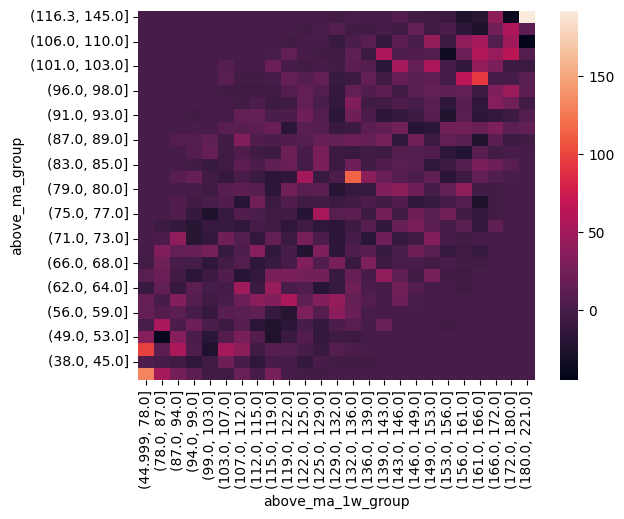

In [18]:
sns.heatmap(glue)

### Wick & tail & return relationship

In [19]:
# k = short_return.groupby(['tail'])[['tail']].count()
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(k)

In [21]:
crop_long_return = long_return[(long_return['tail'] < 2.6) & (long_return.upper_wick <= 4)]
crop_long_return['wick_group'] = pd.cut(crop_long_return['upper_wick'], 20)
crop_long_return['tail_group'] = pd.cut(crop_long_return['tail'], 13)
wtg = crop_long_return.groupby(['wick_group', 'tail_group'])[['return']].mean()
irs = wtg.reset_index()
glue = irs.pivot(index="wick_group", columns="tail_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)

In [22]:
glue

tail_group,"(-0.0025, 0.192]","(0.192, 0.385]","(0.385, 0.577]","(0.577, 0.769]","(0.769, 0.962]","(0.962, 1.154]","(1.154, 1.346]","(1.346, 1.538]","(1.538, 1.731]","(1.731, 1.923]","(1.923, 2.115]","(2.115, 2.308]","(2.308, 2.5]"
wick_group,,,,,,,,,,,,,
"(3.8, 4.0]",1.425000,-3.000000,-3.000000,-3.000000,NaN,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN
"(3.6, 3.8]",4.766667,NaN,5.000000,NaN,-3.000000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN
"(3.4, 3.6]",0.160000,NaN,-3.000000,NaN,-3.000000,9.000000,NaN,NaN,-3.000000,NaN,NaN,NaN,NaN
"(3.2, 3.4]",-1.533333,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3.0, 3.2]",-2.500000,3.000000,NaN,9.000000,-3.000000,NaN,NaN,-3.000000,9.000000,NaN,NaN,NaN,NaN
"(2.8, 3.0]",1.788889,NaN,-1.700000,NaN,-3.000000,9.000000,-3.000000,NaN,-3.000000,NaN,NaN,NaN,NaN
"(2.6, 2.8]",2.790000,1.250000,-3.000000,-3.000000,0.600000,-3.000000,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN
"(2.4, 2.6]",1.363636,-3.000000,3.000000,-0.300000,3.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,-3.000000,NaN
"(2.2, 2.4]",0.550000,3.000000,0.066667,1.975000,-3.000000,-3.000000,NaN,3.000000,-3.000000,NaN,-3.000000,-3.000000,NaN


<Axes: xlabel='tail_group', ylabel='wick_group'>

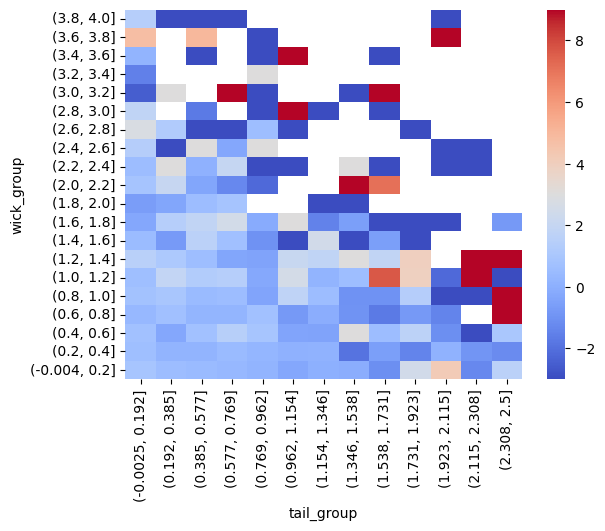

In [24]:
sns.heatmap(glue, cmap = 'coolwarm')

<Axes: xlabel='tail_group', ylabel='wick_group'>

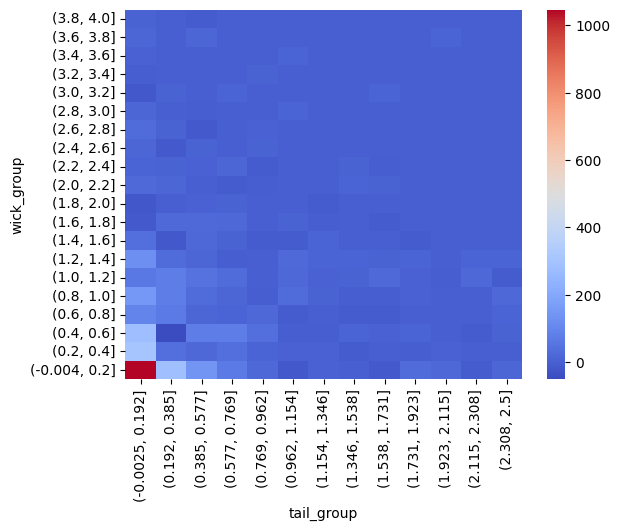

In [27]:
wtgs = crop_long_return.groupby(['wick_group', 'tail_group'])[['return']].sum()
irs = wtgs.reset_index()
glue = irs.pivot(index="wick_group", columns="tail_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)
sns.heatmap(glue, cmap = 'coolwarm')

In [28]:
glue

tail_group,"(-0.0025, 0.192]","(0.192, 0.385]","(0.385, 0.577]","(0.577, 0.769]","(0.769, 0.962]","(0.962, 1.154]","(1.154, 1.346]","(1.346, 1.538]","(1.538, 1.731]","(1.731, 1.923]","(1.923, 2.115]","(2.115, 2.308]","(2.308, 2.5]"
wick_group,,,,,,,,,,,,,
"(3.8, 4.0]",5.7,-3.0,-9.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0
"(3.6, 3.8]",14.3,0.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
"(3.4, 3.6]",0.8,0.0,-3.0,0.0,-3.0,9.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0
"(3.2, 3.4]",-4.6,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(3.0, 3.2]",-20.0,6.0,0.0,9.0,-3.0,0.0,0.0,-3.0,9.0,0.0,0.0,0.0,0.0
"(2.8, 3.0]",16.1,0.0,-5.1,0.0,-3.0,9.0,-3.0,0.0,-3.0,0.0,0.0,0.0,0.0
"(2.6, 2.8]",27.9,5.0,-15.0,-3.0,1.2,-3.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0
"(2.4, 2.6]",15.0,-15.0,6.0,-0.9,6.0,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,0.0
"(2.2, 2.4]",12.1,6.0,0.4,15.8,-12.0,-3.0,0.0,6.0,-6.0,0.0,-3.0,-3.0,0.0


<Axes: xlabel='tail_group', ylabel='wick_group'>

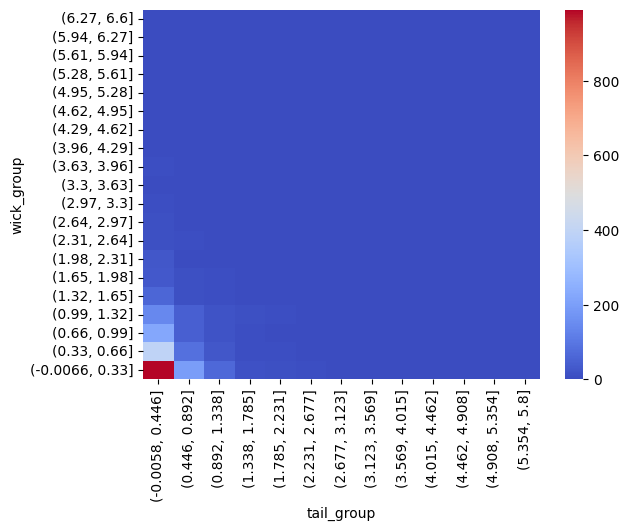

In [25]:
crop_long_return2 = long_positive_return[(long_positive_return['tail'] < 2.6) & (long_positive_return.upper_wick <= 4)]
crop_long_return2['wick_group'] = pd.cut(long_positive_return['upper_wick'], 20)
crop_long_return2['tail_group'] = pd.cut(long_positive_return['tail'], 13)
wtg = crop_long_return2.groupby(['wick_group', 'tail_group'])[['return']].count()
irs = wtg.reset_index()
glue = irs.pivot(index="wick_group", columns="tail_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)
sns.heatmap(glue, cmap = 'coolwarm')

<Axes: xlabel='tail_group', ylabel='wick_group'>

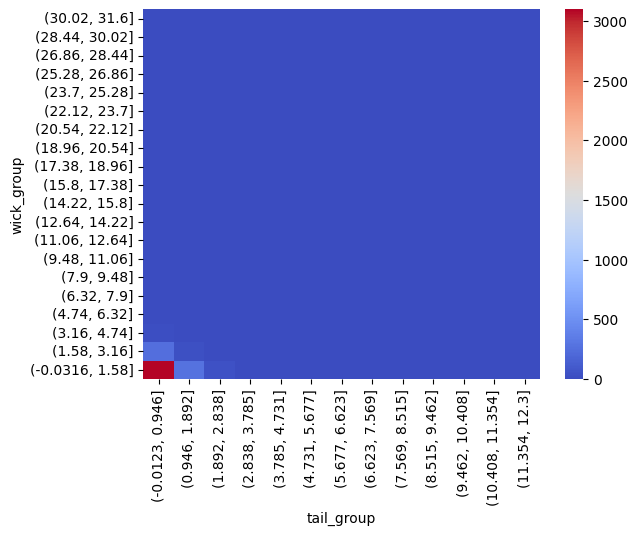

In [26]:
crop_long_return3 = long_negative_return[(long_negative_return['tail'] < 2.6) & (long_negative_return.upper_wick <= 4)]
crop_long_return3['wick_group'] = pd.cut(long_negative_return['upper_wick'], 20)
crop_long_return3['tail_group'] = pd.cut(long_negative_return['tail'], 13)
wtg = crop_long_return3.groupby(['wick_group', 'tail_group'])[['return']].count()
irs = wtg.reset_index()
glue = irs.pivot(index="wick_group", columns="tail_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)
sns.heatmap(glue, cmap = 'coolwarm')

In [29]:
crop_short_return = short_return[(short_return['tail'] < 3.3) & (short_return.upper_wick <= 2)]
short_return['wick_group'] = pd.cut(crop_short_return['upper_wick'], 21)
short_return['tail_group'] = pd.cut(crop_short_return['tail'], 11)
wtg = short_return.groupby(['wick_group', 'tail_group'])[['return']].sum()
irs = wtg.reset_index()
glue = irs.pivot(index="wick_group", columns="tail_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)
glue

tail_group,"(-0.0032, 0.291]","(0.291, 0.582]","(0.582, 0.873]","(0.873, 1.164]","(1.164, 1.455]","(1.455, 1.745]","(1.745, 2.036]","(2.036, 2.327]","(2.327, 2.618]","(2.618, 2.909]","(2.909, 3.2]"
wick_group,,,,,,,,,,,
"(1.905, 2.0]",-3.7,0.0,-3.0,-6.0,9.0,6.0,0.2,0.0,0.0,0.0,0.0
"(1.81, 1.905]",13.9,-3.5,3.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1.714, 1.81]",1.5,0.0,0.0,3.0,0.0,-6.0,-3.0,18.0,0.0,0.0,0.0
"(1.619, 1.714]",3.0,-3.0,0.0,-3.3,-3.0,1.0,9.0,0.0,9.0,0.0,-3.0
"(1.524, 1.619]",-6.0,7.9,18.0,6.0,-3.0,0.0,-3.0,0.0,9.0,-3.0,0.0
"(1.429, 1.524]",16.8,-4.6,-6.0,6.0,0.0,3.0,6.9,9.0,0.6,-3.0,0.0
"(1.333, 1.429]",19.5,-2.3,0.7,-12.0,6.0,-0.8,-3.0,0.0,-3.0,0.0,0.0
"(1.238, 1.333]",7.7,-4.9,1.1,-6.3,4.4,-3.0,3.0,-3.0,0.0,2.7,0.0
"(1.143, 1.238]",2.3,-9.0,9.7,15.0,7.0,3.0,-3.0,0.0,2.5,0.0,0.0


<Axes: xlabel='tail_group', ylabel='wick_group'>

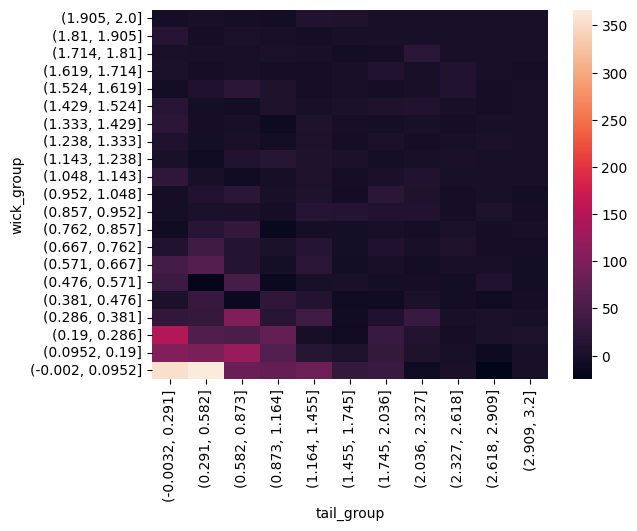

In [30]:
sns.heatmap(glue)

### Low & High & return relationship

In [67]:
long_return['high_diff_group'] = pd.qcut(long_return.diff_high, 30)
long_return['low_diff_group'] = pd.qcut(long_return.diff_low, 30)
grpd = long_return.groupby(['high_diff_group', 'low_diff_group'])[['return']].sum()
irs = grpd.reset_index()
glue = irs.pivot(index="high_diff_group", columns="low_diff_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)

<Axes: xlabel='low_diff_group', ylabel='high_diff_group'>

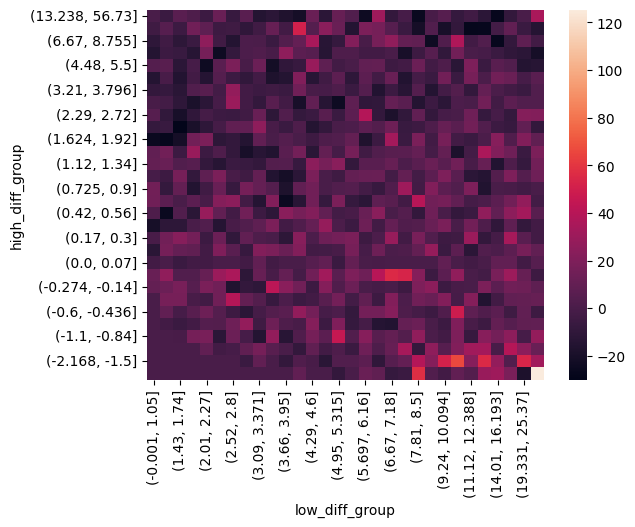

In [74]:
sns.heatmap(glue)

### Pattern & return relationship

In [21]:
pattern_vs_positive_return_of_long = long_positive_return[['model']].groupby([long_positive_return.model]).count()
pattern_vs_positive_return_of_long['model'].sort_values()

model
bullish_gap, rising_n                       1
bullish_gap, rising_three                   3
bullish_separating_line                    14
rising_n                                   41
bullish_gap, fair_value_rising_gap         73
bullish_gap                                83
rising_three                               91
bearish_neck, bullish_separating_line     134
bullish_neck                              553
fair_value_rising_gap                    1529
Name: model, dtype: int64

In [22]:
pattern_vs_positive_return_of_short = short_positive_return[['model']].groupby([short_positive_return.model]).count()
pattern_vs_positive_return_of_short['model'].sort_values()

model
bearish_gap, falling_n                    1
bearish_gap, falling_three                2
falling_n                                52
bearish_gap, fair_value_falling_gap      63
bearish_gap                              83
falling_three                            91
fair_value_falling_gap                 1331
Name: model, dtype: int64

### RSI & return relationship

In [23]:
rsi_vs_positive_return_of_long = long_positive_return[['RSI_group']].groupby([long_positive_return.RSI_group]).count()
rsi_vs_positive_return_of_long['RSI_group'].sort_values()

RSI_group
30      33
40     153
50     364
60     607
100    646
70     719
Name: RSI_group, dtype: int64

In [24]:
rsi_vs_negative_return_of_long = long_negative_return[['RSI_group']].groupby([long_negative_return.RSI_group]).count()
rsi_vs_negative_return_of_long['RSI_group'].sort_values()

RSI_group
30       95
40      257
100     608
50      662
70     1039
60     1132
Name: RSI_group, dtype: int64

In [ ]:
short_return['RSI'] = pd.cut(short_return['RSI'], 20)
short_return['tail_group'] = pd.cut(short_return['tail'], 20)
wtg = short_return.groupby(['wick_group', 'tail_group'])[['return']].sum()
irs = wtg.reset_index()
glue = irs.pivot(index="wick_group", columns="tail_group", values="return").sort_index(ascending=False)
glue = glue[glue.columns].astype(float)
glue

### Hourly vs Return relationship

In [25]:
hourly_vs_positive_return = positive_return[['return']].groupby([positive_return.index.hour]).count()
hourly_vs_positive_return['return'].sort_values()

Date
11     478
9      791
10     820
14     976
13    1080
Name: return, dtype: int64

In [26]:
hourly_vs_negative_return = negative_return[['return']].groupby([negative_return.index.hour]).count()
hourly_vs_negative_return['return'].sort_values()

Date
14     864
11     873
9     1348
10    1580
13    1583
Name: return, dtype: int64

### Monthly vs Return relationship

In [27]:
monthly_vs_positive_return = positive_return[['return']].groupby([positive_return.index.month]).count()
monthly_vs_positive_return['return'].sort_values()

Date
2     273
6     306
9     319
7     333
8     351
1     352
4     353
3     355
12    355
5     367
11    385
10    396
Name: return, dtype: int64

In [28]:
monthly_vs_positive_return_of_long = long_positive_return[['return']].groupby([long_positive_return.index.month]).count()
monthly_vs_positive_return_of_long['return'].sort_values()

Date
9     173
2     175
6     175
3     200
7     202
1     204
12    218
4     221
10    224
11    230
8     241
5     259
Name: return, dtype: int64

In [29]:
monthly_vs_negative_return_of_long = long_negative_return[['return']].groupby([long_negative_return.index.month]).count()
monthly_vs_negative_return_of_long['return'].sort_values()

Date
9     283
8     285
4     286
2     288
7     304
1     321
11    327
3     331
5     331
10    332
12    335
6     370
Name: return, dtype: int64

### Trend vs Return relationship

In [30]:
trend_vs_return_of_long = long_return[['return']].groupby([long_return.trend_1w]).sum()
trend_vs_return_of_long['return'].sort_values()

trend_1w
switch     138.3
down      1091.1
up        2108.7
Name: return, dtype: object

In [31]:
trend_vs_return_of_short = short_return[['return']].groupby([short_return.trend_1w]).sum()
trend_vs_return_of_short['return'].sort_values()

trend_1w
switch      32.8
up         882.4
down      1686.1
Name: return, dtype: object

### Trend vs Positive return relationship

In [32]:
trend_vs_positive_return_of_long = long_positive_return[['return']].groupby([long_positive_return.trend_1w]).count()
trend_vs_positive_return_of_long['return'].sort_values()

trend_1w
switch      45
down      1014
up        1463
Name: return, dtype: int64

In [33]:
trend_vs_negative_return_of_long = long_negative_return[['return']].groupby([long_negative_return.trend_1w]).count()
trend_vs_negative_return_of_long['return'].sort_values()

trend_1w
switch      38
down      1705
up        2050
Name: return, dtype: int64

In [34]:
trend_vs_positive_return_of_short = short_positive_return[['return']].groupby([short_positive_return.trend_1w]).count()
trend_vs_positive_return_of_short['return'].sort_values()

trend_1w
switch     20
down      797
up        806
Name: return, dtype: int64

## Today signal